In [122]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [109]:
mnist = fetch_openml('mnist_784')

In [110]:
x = mnist.data
y = mnist.target

# (o dataset já vem embaralhado)

# normalizando as intensidades de pixel para o intervalo [0, 1]
x = x / 255.0

x_train = x[:60000]
y_train = y[:60000]

x_train = np.array(x_train)

x_test = x[60000:]
y_test = y[60000:]

x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = np.insert(x_train, 0, 1, axis=1)
x_test = np.insert(x_test, 0, 1, axis=1)

x_train.shape

(60000, 785)

In [111]:
# pegando todas as classes
labels = np.unique(y)
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [112]:
y_all_train = np.zeros((len(y_train), len(labels)))
for l in labels:
    y_all_train[:, int(l)] = np.where(y_train == l, 1, -1)
    y_all_train[:, int(l)] = np.array(y_all_train[:, int(l)])

In [113]:
w = np.zeros((x_train.shape[1], len(labels)))
w.shape

(785, 10)

In [114]:
for l in labels:
    y_train = y_all_train[:, int(l)]
    wl = np.linalg.lstsq(x_train, y_train, rcond=None)[0]
    w[:, int(l)] = wl
w

array([[-6.84400682e-01, -5.17346997e-01, -9.00343051e-01, ...,
        -7.16918890e-01, -1.24600412e+00, -9.08975751e-01],
       [-1.34976405e-12, -4.37426484e-12, -4.20035187e-12, ...,
         3.47453490e-12,  5.13909748e-12,  1.36354816e-12],
       [-5.55447355e-12, -1.70434222e-11, -1.74780156e-11, ...,
         1.35561562e-11,  2.21548370e-11,  4.47013954e-12],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [115]:
yw = x_test @ w
yw.shape

(10000, 10)

In [116]:
y_hat = np.argmax(yw, axis=1)

In [119]:
# comparando y_hat com y_test
accuracy = np.mean(y_hat == y_test.astype(int))

print(f'Precisão de {accuracy*100:.2f}%')

Precisão de 86.03%


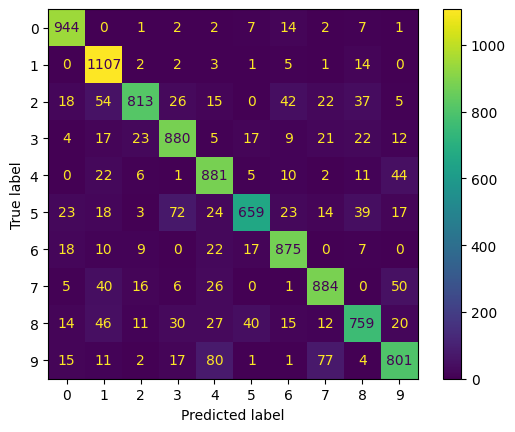

In [127]:
cm = confusion_matrix(y_test.astype(int), y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()